In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [3]:

# Define the model class
class FlexibleModel(nn.Module):
    def __init__(self, input_size, layer_sizes):
        super(FlexibleModel, self).__init__()
        self.layers = nn.ModuleList()
        for i, size in enumerate(layer_sizes):
            # Determine input size for the current layer
            in_size = input_size if i == 0 else layer_sizes[i - 1]
            self.layers.append(nn.Linear(in_size, size))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        return self.layers[-1](x)

In [4]:
# Function to load data
def load_data(train_batch_size, test_batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std deviation
    ])

    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True, transform=transform),
        batch_size=train_batch_size, shuffle=True
    )

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, download=True, transform=transform),
        batch_size=test_batch_size, shuffle=False
    )

    return train_loader, test_loader


In [5]:
# Training function
def train(model, optimizer, train_loader, loss_fn):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data.view(-1, 784))
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [6]:
# Evaluation function
def evaluate(model, loader, loss_fn):
    model.eval()
    loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in loader:
            output = model(data.view(-1, 784))
            loss += loss_fn(output, target).item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    return loss / len(loader), correct / total


In [7]:

# Function to train and evaluate the model
def train_and_evaluate(model, optimizer, train_loader, test_loader, loss_fn, epochs=10):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader, loss_fn)
        train_loss, train_acc = evaluate(model, train_loader, loss_fn)
        test_loss, test_acc = evaluate(model, test_loader, loss_fn)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return train_losses, test_losses, train_accuracies, test_accuracies


In [8]:

# Model configurations
model_configurations = [
    [5, 9, 10],
    [25, 50, 10],
    [50, 100, 10],
    [60, 120, 10],
    [100, 200, 10],
    [150, 300, 10],
    [200, 400, 10],
    [250, 500, 10],
    [280, 560, 10],
    [350, 600, 10]
]

# Training parameters
train_batch_size = 64
test_batch_size = 1000
epochs = 10


In [9]:

# Lists to store results
train_losses_list, test_losses_list = [], []
train_accuracies_list, test_accuracies_list = [], []


In [10]:
# Load data
train_loader, test_loader = load_data(train_batch_size, test_batch_size)


In [11]:
# Train models for each configuration
for i, config in enumerate(model_configurations, 1):
    model = FlexibleModel(784, config)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()
    
    print(f"\nTraining Model {i} with Configuration: {config}")
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(model, optimizer, train_loader, test_loader, loss_fn, epochs)
    
    train_losses_list.append(train_losses)
    test_losses_list.append(test_losses)
    train_accuracies_list.append(train_accuracies)
    test_accuracies_list.append(test_accuracies)


Training Model 1 with Configuration: [5, 9, 10]
Epoch 1/10, Train Loss: 0.5232, Train Acc: 0.8501, Test Loss: 0.5131, Test Acc: 0.8530
Epoch 2/10, Train Loss: 0.4477, Train Acc: 0.8708, Test Loss: 0.4464, Test Acc: 0.8711
Epoch 3/10, Train Loss: 0.4114, Train Acc: 0.8818, Test Loss: 0.4117, Test Acc: 0.8821
Epoch 4/10, Train Loss: 0.4006, Train Acc: 0.8837, Test Loss: 0.3993, Test Acc: 0.8880
Epoch 5/10, Train Loss: 0.3754, Train Acc: 0.8930, Test Loss: 0.3820, Test Acc: 0.8945
Epoch 6/10, Train Loss: 0.3604, Train Acc: 0.8974, Test Loss: 0.3638, Test Acc: 0.9017
Epoch 7/10, Train Loss: 0.3634, Train Acc: 0.8926, Test Loss: 0.3714, Test Acc: 0.8962
Epoch 8/10, Train Loss: 0.3446, Train Acc: 0.9019, Test Loss: 0.3539, Test Acc: 0.9042
Epoch 9/10, Train Loss: 0.3380, Train Acc: 0.9023, Test Loss: 0.3560, Test Acc: 0.9012
Epoch 10/10, Train Loss: 0.3294, Train Acc: 0.9052, Test Loss: 0.3441, Test Acc: 0.9072

Training Model 2 with Configuration: [25, 50, 10]
Epoch 1/10, Train Loss: 0.213

Epoch 10/10, Train Loss: 0.0196, Train Acc: 0.9937, Test Loss: 0.0978, Test Acc: 0.9789

Training Model 10 with Configuration: [350, 600, 10]
Epoch 1/10, Train Loss: 0.0938, Train Acc: 0.9713, Test Loss: 0.1103, Test Acc: 0.9657
Epoch 2/10, Train Loss: 0.0690, Train Acc: 0.9781, Test Loss: 0.1009, Test Acc: 0.9668
Epoch 3/10, Train Loss: 0.0456, Train Acc: 0.9854, Test Loss: 0.0820, Test Acc: 0.9743
Epoch 4/10, Train Loss: 0.0392, Train Acc: 0.9866, Test Loss: 0.0867, Test Acc: 0.9753
Epoch 5/10, Train Loss: 0.0256, Train Acc: 0.9916, Test Loss: 0.0787, Test Acc: 0.9786
Epoch 6/10, Train Loss: 0.0197, Train Acc: 0.9936, Test Loss: 0.0824, Test Acc: 0.9799
Epoch 7/10, Train Loss: 0.0254, Train Acc: 0.9914, Test Loss: 0.0923, Test Acc: 0.9759
Epoch 8/10, Train Loss: 0.0325, Train Acc: 0.9892, Test Loss: 0.0972, Test Acc: 0.9776
Epoch 9/10, Train Loss: 0.0165, Train Acc: 0.9948, Test Loss: 0.0882, Test Acc: 0.9808
Epoch 10/10, Train Loss: 0.0126, Train Acc: 0.9960, Test Loss: 0.0903, Test

In [12]:

# Plotting results
def plot_results(param_arr, train_losses_list, test_losses_list, train_accuracies_list, test_accuracies_list):
    plt.figure(figsize=(12, 6))
    for i, params in enumerate(param_arr):
        plt.scatter([params] * epochs, train_losses_list[i], color='r')
        plt.scatter([params] * epochs, test_losses_list[i], color='g')

    plt.title('Model Loss Comparison')
    plt.legend(['Train Loss', 'Test Loss'])
    plt.xlabel('Parameters')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    for i, params in enumerate(param_arr):
        plt.scatter([params] * epochs, train_accuracies_list[i], color='r', marker='o', alpha=0.7)
        plt.scatter([params] * epochs, test_accuracies_list[i], color='g', marker='x', alpha=0.7)

    plt.title('Model Accuracy Comparison')
    plt.legend(['Train Accuracy', 'Test Accuracy'])
    plt.xlabel('Parameters')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

In [13]:
# Extract parameters for plotting
param_arr = [sum(p.numel() for p in FlexibleModel(784, config).parameters()) for config in model_configurations]



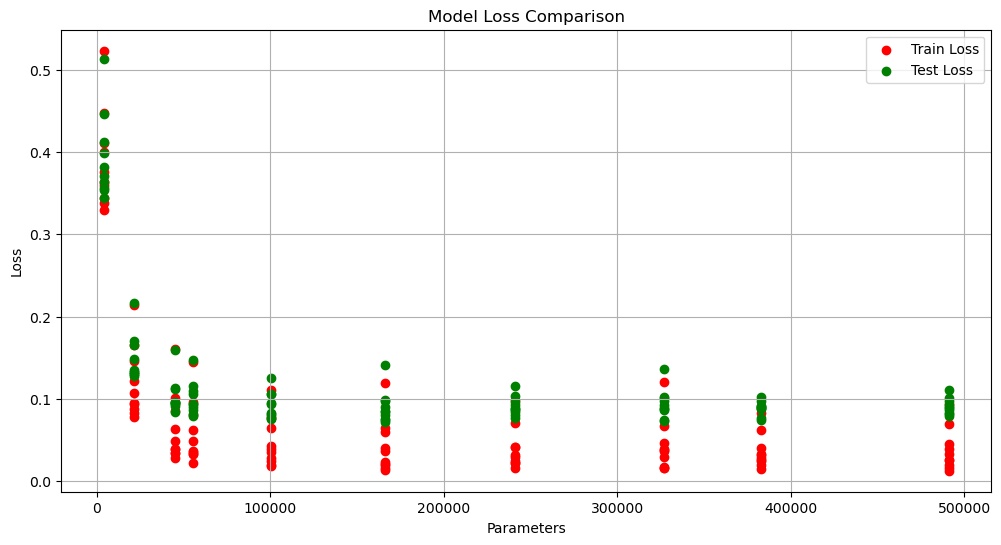

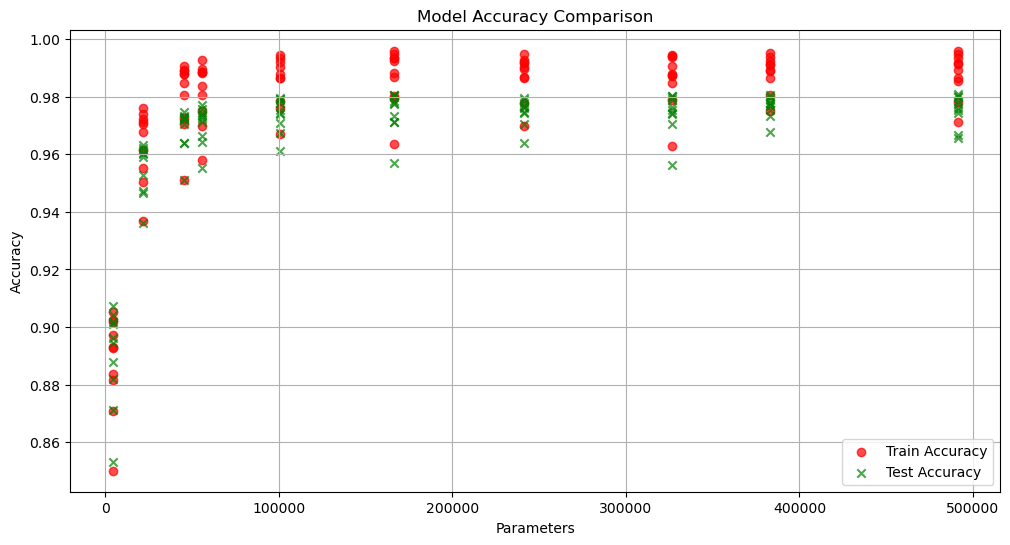

In [14]:
# Plot the results
plot_results(param_arr, train_losses_list, test_losses_list, train_accuracies_list, test_accuracies_list)